In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [60]:
import yfinance as yf

start = '2019-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end)
display(df.head())

C:\Users\anjal\AppData\Local\Temp\ipykernel_15220\1945397555.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.575211,37.796495,36.697218,36.854258,148158800
2019-01-03,33.832447,34.672369,33.787238,34.258355,365248800
2019-01-04,35.276730,35.345734,34.215527,34.389221,234428400
2019-01-07,35.198196,35.412343,34.715182,35.381410,219111200
2019-01-08,35.869183,36.123778,35.338581,35.586036,164101200


In [61]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2019-01-02,37.575211,37.796495,36.697218,36.854258,148158800
1,2019-01-03,33.832447,34.672369,33.787238,34.258355,365248800
2,2019-01-04,35.276730,35.345734,34.215527,34.389221,234428400
3,2019-01-07,35.198196,35.412343,34.715182,35.381410,219111200
4,2019-01-08,35.869183,36.123778,35.338581,35.586036,164101200


In [62]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1504,2024-12-23,254.367004,254.745650,252.553435,253.868773,40858800
1505,2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
1506,2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
1507,2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300
1508,2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500


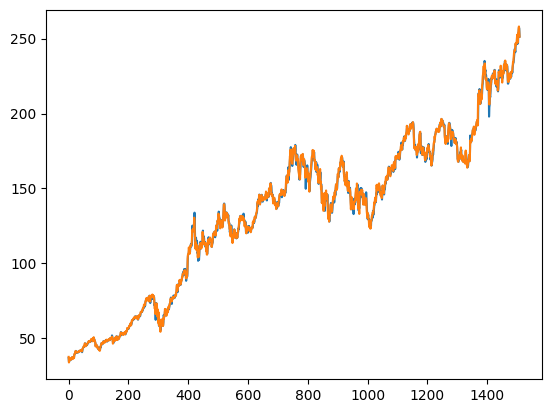

In [63]:
plt.plot(df[['Open','Close']])

In [64]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1504,228.410515
1505,228.797497
1506,229.297937
1507,229.784480


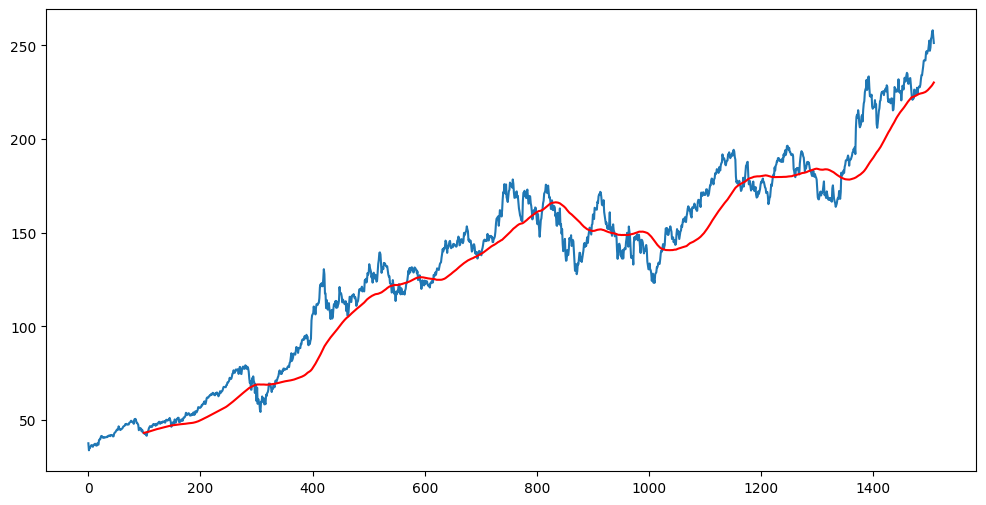

In [65]:
plt.figure(figsize = ( 12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [66]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1504,210.238069
1505,210.666911
1506,211.097455
1507,211.521335


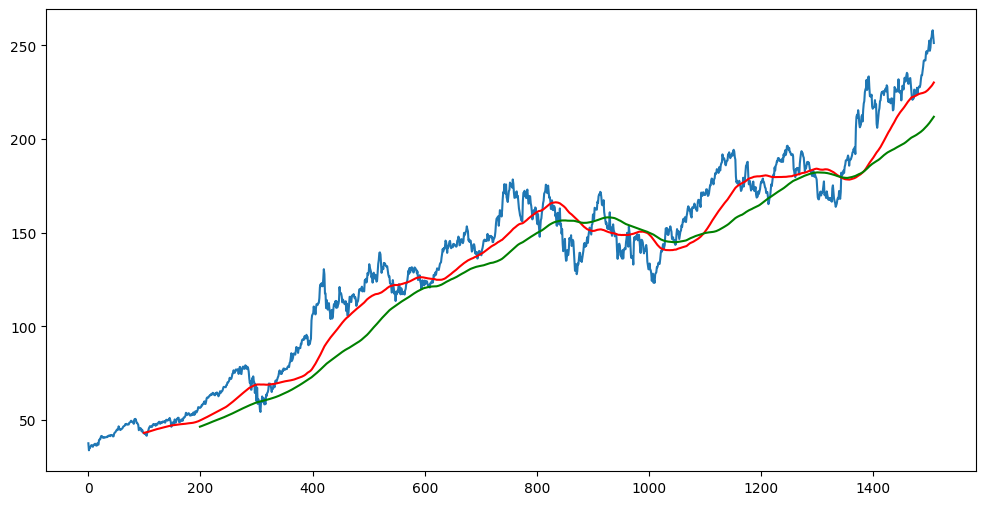

In [67]:
plt.figure(figsize = ( 12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [68]:
df.shape

(1509, 6)

In [26]:
# Splitting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760002],
       [0.02806501],
       [0.02377924],
       ...,
       [0.88408388],
       [0.8912315 ],
       [0.88640195]], shape=(1760, 1))

In [71]:
data_training_array.shape

(1760, 1)

In [72]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])   # 100 previous values
    y_train.append(data_training_array[i, 0])      # next value

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape for LSTM: (samples, timesteps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print("x_train shape:", x_train.shape)

x_train shape: (1660, 100, 1)


In [73]:
# ML Model

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout, LSTM  # pyright: ignore[reportMissingImports]
from tensorflow.keras.models import Sequential  # pyright: ignore[reportMissingImports]

In [76]:
# Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - loss: 0.0644
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0136
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0120
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0103
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0101
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0087
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0083
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0072
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0074
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0074
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0067
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0068
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0060
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - l

In [79]:
model.save("C:/Users/anjal/OneDrive/Desktop/keras_model.h5")

In [80]:
data_testing.head()

Ticker,AAPL
1760,26.930649
1761,26.720703
1762,26.796831
1763,26.766846
1764,26.902954


In [81]:
data_training.tail(100)

Ticker,AAPL
1660,24.874212
1661,24.975197
1662,24.789289
1663,24.773220
1664,24.830595
...,...
1755,27.006777
1756,26.829136
1757,26.882196
1758,27.052921


In [82]:
past_100_days = data_training.tail(100)

In [83]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [84]:
final_df.head()

Ticker,AAPL
0,24.874212
1,24.975197
2,24.789289
3,24.773220
4,24.830595


In [85]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573564],
       [0.02789646],
       [0.02391851],
       [0.02357466],
       [0.02480234],
       [0.03118725],
       [0.03069607],
       [0.02991018],
       [0.02922266],
       [0.030598  ],
       [0.02642309],
       [0.02809305],
       [0.02406568],
       [0.02180642],
       [0.01871231],
       [0.01812302],
       [0.01409568],
       [0.01458682],
       [0.01768094],
       [0.02259235],
       [0.02244489],
       [0.0256865 ],
       [0.01173811],
       [0.        ],
       [0.01134525],
       [0.02367269],
       [0.04243422],
       [0.06109751],
       [0.057905  ],
       [0.05132391],
       [0.05127456],
       [0.05117649],
       [0.0564315 ],
       [0.04705084],
       [0.04788574],
       [0.0489172 ],
       [0.053141  ],
       [0.04444787],
       [0.04872081],
       [0.04611775],
       [0.04847512],
       [0.04872081],
       [0.05284637],
       [0.05368128],
       [0.06345504],
       [0.06468272],
       [0.06979056],
       [0.068

In [86]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [87]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [88]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


In [89]:
y_predicted.shape

(755, 1)

In [90]:
y_test

array([0.0697382 , 0.06524589, 0.06687484, 0.06623323, 0.0691456 ,
       0.0755634 , 0.0808949 , 0.08148725, 0.08464675, 0.08217825,
       0.08114169, 0.08588067, 0.08583141, 0.08479485, 0.08588067,
       0.08627569, 0.08573285, 0.09516167, 0.09545776, 0.09550714,
       0.09392738, 0.0925453 , 0.12907584, 0.12799002, 0.13070491,
       0.1366783 , 0.1427996 , 0.14531736, 0.15002728, 0.14854003,
       0.15434079, 0.1629183 , 0.16534783, 0.16455435, 0.16638879,
       0.17124759, 0.17328062, 0.17040477, 0.17104924, 0.17238785,
       0.1726855 , 0.18656761, 0.18245257, 0.18651806, 0.18433664,
       0.18522896, 0.18265108, 0.18106438, 0.18334506, 0.1836425 ,
       0.18260162, 0.18988958, 0.19103004, 0.18755927, 0.19484764,
       0.18681583, 0.19464945, 0.19217034, 0.19078223, 0.19197224,
       0.20644915, 0.20803602, 0.20709358, 0.20575542, 0.20595369,
       0.21125841, 0.20753999, 0.20575542, 0.2041688 , 0.20332586,
       0.19569034, 0.19653328, 0.19281485, 0.19668216, 0.19355

In [91]:
y_predicted

array([[0.14982696],
       [0.15067406],
       [0.15121898],
       [0.1514379 ],
       [0.15134707],
       [0.15100339],
       [0.15050709],
       [0.1499869 ],
       [0.14956486],
       [0.14934345],
       [0.14937061],
       [0.14964664],
       [0.15014827],
       [0.15084   ],
       [0.15167074],
       [0.15258111],
       [0.15350956],
       [0.15439525],
       [0.1552062 ],
       [0.1559314 ],
       [0.15656702],
       [0.15710995],
       [0.15755717],
       [0.15801844],
       [0.15860833],
       [0.15942787],
       [0.16055997],
       [0.16205974],
       [0.16388348],
       [0.16604632],
       [0.16852131],
       [0.17126024],
       [0.174215  ],
       [0.17733501],
       [0.18056242],
       [0.18383881],
       [0.18711685],
       [0.19035804],
       [0.19352473],
       [0.19658233],
       [0.19950202],
       [0.20224875],
       [0.20482022],
       [0.20722142],
       [0.20946735],
       [0.2115688 ],
       [0.2135332 ],
       [0.215

In [92]:
scaler.scale_

array([0.02139748])

In [93]:
scaler_factor = 1/0.02139748
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

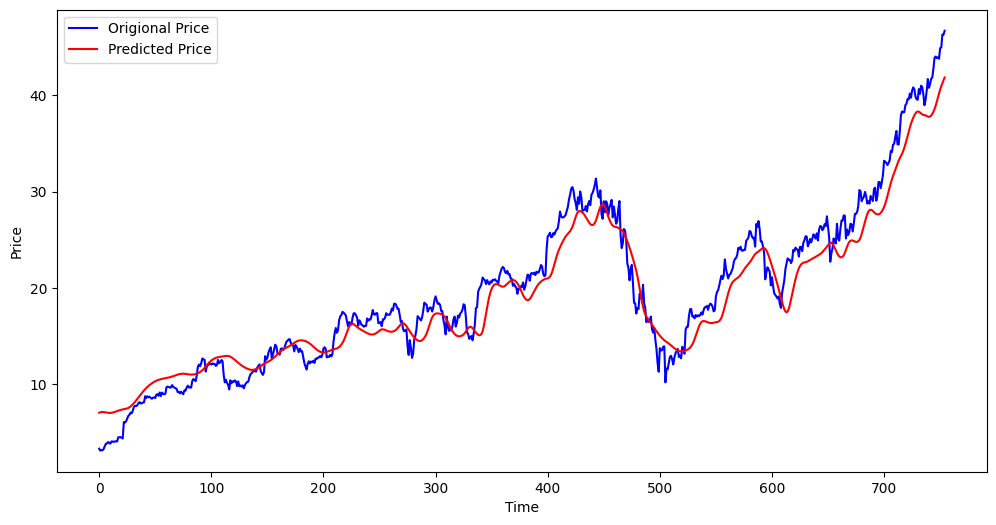

In [94]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Origional Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()